In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
train = pd.read_csv('./Malware_data.csv')
train['Class'] = [ i - 1 for i in train['Class']]
target = 'Class'
predictors = [x for x in train.columns if x not in target]

/usr/local/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
param_test1 = {'max_depth':[3, 5, 7, 9], 'min_samples_split':[200, 400, 600, 800]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, min_samples_split=500,
                                                               min_samples_leaf=50, max_depth=8, max_features='sqrt',
                                                               subsample=0.8, random_state=10), 
                        param_grid = param_test1, scoring='accuracy', n_jobs=4, iid=False, cv=5, verbose=3)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] min_samples_split=200, max_depth=3 ..............................
[CV] min_samples_split=200, max_depth=3 ..............................
[CV] min_samples_split=200, max_depth=3 ..............................
[CV] min_samples_split=200, max_depth=3 ..............................
[CV] ..... min_samples_split=200, max_depth=3, score=0.982996 -  37.8s
[CV] ..... min_samples_split=200, max_depth=3, score=0.979263 -  36.6s
[CV] min_samples_split=200, max_depth=3 ..............................
[CV] ..... min_samples_split=200, max_depth=3, score=0.977502 -  38.7s
[CV] ..... min_samples_split=200, max_depth=3, score=0.980221 -  38.0s
[CV] min_samples_split=400, max_depth=3 ..............................
[CV] min_samples_split=400, max_depth=3 ..............................
[CV] min_samples_split=400, max_depth=3 ..............................
[CV] ..... min_samples_split=400, max_depth=3, score=0.975666 -  33.3s
[CV] min_samples

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  4.0min


[CV] ..... min_samples_split=400, max_depth=5, score=0.982094 -  54.0s
[CV] min_samples_split=400, max_depth=5 ..............................
[CV] ..... min_samples_split=400, max_depth=5, score=0.984375 -  53.8s
[CV] ..... min_samples_split=400, max_depth=5, score=0.980221 -  53.4s
[CV] min_samples_split=400, max_depth=5 ..............................
[CV] min_samples_split=600, max_depth=5 ..............................
[CV] ..... min_samples_split=200, max_depth=5, score=0.981567 -  58.1s
[CV] min_samples_split=600, max_depth=5 ..............................
[CV] ..... min_samples_split=600, max_depth=5, score=0.979798 -  52.9s
[CV] min_samples_split=600, max_depth=5 ..............................
[CV] ..... min_samples_split=400, max_depth=5, score=0.982488 -  55.4s
[CV] min_samples_split=600, max_depth=5 ..............................
[CV] ..... min_samples_split=400, max_depth=5, score=0.979263 -  55.5s
[CV] min_samples_split=600, max_depth=5 ..............................
[CV] .

[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed: 21.7min finished


([mean: 0.97930, std: 0.00226, params: {'min_samples_split': 200, 'max_depth': 3},
  mean: 0.97727, std: 0.00170, params: {'min_samples_split': 400, 'max_depth': 3},
  mean: 0.97488, std: 0.00171, params: {'min_samples_split': 600, 'max_depth': 3},
  mean: 0.97359, std: 0.00219, params: {'min_samples_split': 800, 'max_depth': 3},
  mean: 0.98399, std: 0.00184, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.98169, std: 0.00179, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.97930, std: 0.00122, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.97884, std: 0.00083, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.98564, std: 0.00221, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.98261, std: 0.00156, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.98058, std: 0.00156, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.97893, std: 0.00122, params: {'min_samples_split': 800, 'max_depth': 7},
  me

In [3]:
param_test2 = {'n_estimators':[100, 120, 140, 160, 180, 200], 'min_samples_leaf':[20, 30, 40, 50, 60, 70] }
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, min_samples_split=200,
                                                               min_samples_leaf=50, max_depth=9, max_features='sqrt',
                                                               subsample=0.8, random_state=10), 
                        param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5, verbose=3)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] n_estimators=100, min_samples_leaf=20 ...........................
[CV] n_estimators=100, min_samples_leaf=20 ...........................
[CV] n_estimators=100, min_samples_leaf=20 ...........................
[CV] n_estimators=100, min_samples_leaf=20 ...........................
[CV] .. n_estimators=100, min_samples_leaf=20, score=0.989899 - 1.7min
[CV] n_estimators=100, min_samples_leaf=20 ...........................
[CV] .. n_estimators=100, min_samples_leaf=20, score=0.989890 - 1.7min
[CV] n_estimators=120, min_samples_leaf=20 ...........................
[CV] .. n_estimators=100, min_samples_leaf=20, score=0.985741 - 1.7min
[CV] n_estimators=120, min_samples_leaf=20 ...........................
[CV] .. n_estimators=100, min_samples_leaf=20, score=0.990323 - 1.7min
[CV] n_estimators=120, min_samples_leaf=20 ...........................
[CV] .. n_estimators=100, min_samples_leaf=20, score=0.989862 - 1.8min
[CV] n_estimato

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 14.6min


[CV] .. n_estimators=180, min_samples_leaf=20, score=0.991705 - 3.0min
[CV] n_estimators=200, min_samples_leaf=20 ...........................
[CV] .. n_estimators=200, min_samples_leaf=20, score=0.992195 - 3.4min
[CV] n_estimators=200, min_samples_leaf=20 ...........................
[CV] .. n_estimators=200, min_samples_leaf=20, score=0.990809 - 3.4min
[CV] n_estimators=100, min_samples_leaf=30 ...........................
[CV] .. n_estimators=200, min_samples_leaf=20, score=0.989880 - 3.4min
[CV] n_estimators=100, min_samples_leaf=30 ...........................
[CV] .. n_estimators=100, min_samples_leaf=30, score=0.990358 - 1.6min
[CV] n_estimators=100, min_samples_leaf=30 ...........................
[CV] .. n_estimators=100, min_samples_leaf=30, score=0.990349 - 1.6min
[CV] n_estimators=100, min_samples_leaf=30 ...........................
[CV] .. n_estimators=200, min_samples_leaf=20, score=0.994009 - 3.2min
[CV] n_estimators=100, min_samples_leaf=30 ...........................
[CV] .

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 178.9min


[CV] .. n_estimators=100, min_samples_leaf=60, score=0.988051 - 1.6min
[CV] n_estimators=100, min_samples_leaf=60 ...........................
[CV] .. n_estimators=200, min_samples_leaf=50, score=0.990323 - 3.1min
[CV] n_estimators=120, min_samples_leaf=60 ...........................
[CV] .. n_estimators=100, min_samples_leaf=60, score=0.982521 - 1.6min
[CV] n_estimators=120, min_samples_leaf=60 ...........................
[CV] .. n_estimators=100, min_samples_leaf=60, score=0.984793 - 1.6min
[CV] n_estimators=120, min_samples_leaf=60 ...........................
[CV] .. n_estimators=100, min_samples_leaf=60, score=0.982028 - 1.6min
[CV] n_estimators=120, min_samples_leaf=60 ...........................
[CV] .. n_estimators=120, min_samples_leaf=60, score=0.988981 - 1.9min
[CV] n_estimators=120, min_samples_leaf=60 ...........................
[CV] .. n_estimators=120, min_samples_leaf=60, score=0.988971 - 1.9min
[CV] n_estimators=140, min_samples_leaf=60 ...........................
[CV] .

[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed: 217.1min finished


([mean: 0.98914, std: 0.00171, params: {'n_estimators': 100, 'min_samples_leaf': 20},
  mean: 0.98997, std: 0.00178, params: {'n_estimators': 120, 'min_samples_leaf': 20},
  mean: 0.99025, std: 0.00194, params: {'n_estimators': 140, 'min_samples_leaf': 20},
  mean: 0.99098, std: 0.00180, params: {'n_estimators': 160, 'min_samples_leaf': 20},
  mean: 0.99126, std: 0.00181, params: {'n_estimators': 180, 'min_samples_leaf': 20},
  mean: 0.99190, std: 0.00144, params: {'n_estimators': 200, 'min_samples_leaf': 20},
  mean: 0.98767, std: 0.00257, params: {'n_estimators': 100, 'min_samples_leaf': 30},
  mean: 0.98905, std: 0.00147, params: {'n_estimators': 120, 'min_samples_leaf': 30},
  mean: 0.98997, std: 0.00158, params: {'n_estimators': 140, 'min_samples_leaf': 30},
  mean: 0.99006, std: 0.00142, params: {'n_estimators': 160, 'min_samples_leaf': 30},
  mean: 0.99080, std: 0.00123, params: {'n_estimators': 180, 'min_samples_leaf': 30},
  mean: 0.99117, std: 0.00121, params: {'n_estimators'

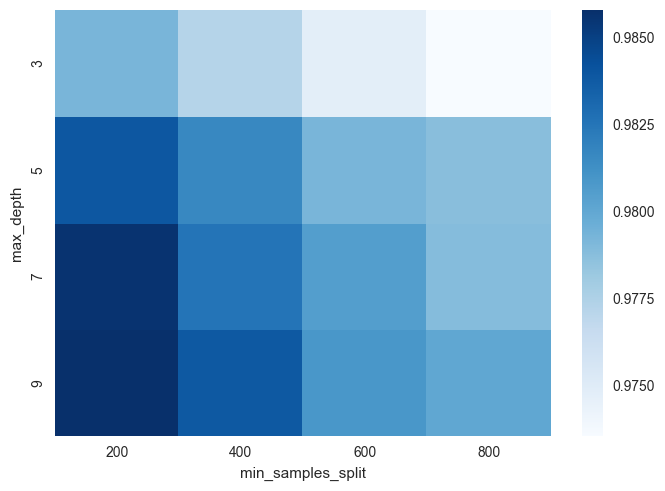

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

grid_visualization1 = []

for grid_pair in gsearch1.grid_scores_:
    grid_visualization1.append(grid_pair.mean_validation_score)
    
grid_visualization1 = np.array(grid_visualization1)
grid_visualization1.shape = (4, 4)
sb.heatmap(grid_visualization1, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, gsearch1.param_grid['min_samples_split'])
plt.yticks(np.arange(4) + 0.5, gsearch1.param_grid['max_depth'][::-1])
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')

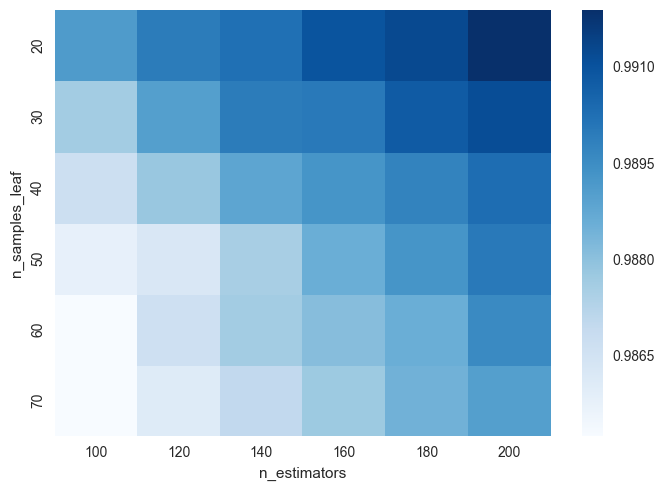

In [5]:
grid_visualization2 = []
for grid_pair in gsearch2.grid_scores_:
    grid_visualization2.append(grid_pair.mean_validation_score)
grid_visualization2 = np.array(grid_visualization2)
grid_visualization2.shape = (6, 6)
sb.heatmap(grid_visualization2, cmap='Blues')
plt.xticks(np.arange(6) + 0.5, gsearch2.param_grid['n_estimators'])
plt.yticks(np.arange(6) + 0.5, gsearch2.param_grid['min_samples_leaf'][::-1])
plt.xlabel('n_estimators')
plt.ylabel('n_samples_leaf')